<a href="https://colab.research.google.com/github/SNEHA-17/ETE456_LabProjects/blob/main/1608004_Classification_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**ETE456: Implementation of Classificatiion Algorithms on a Real World Dataset**

**Objectives:**



1.   To pre-process the data before feeding into the ML models.
2.   To apply various classification algorithms on the real world dataset.

**Problem Statement:** According to the World Health Organization (WHO) stroke is the 2nd leading cause of death globally, responsible for approximately 11% of total deaths. This dataset is used to predict whether a patient is likely to get stroke based on the input parameters like gender, age, various diseases, and smoking status. Each row in the data provides relavant information about the patient. So, prediction of whether a patient is likely to get stroke from the given dataset?

**Data Preprocessing:**

*   Taking care of missing data.


*   Exploratory data analysis by pandas profiling and klib.
*   Label encoding and then implementing on different models to find R-squared values.

*   One Hot encoding and then implementing on different models with calculation of R-squared values.



In [ ]:
# Downloading the data
!wget -O stroke-data.csv https://www.dropbox.com/s/zgburk3yces5tee/healthcare-dataset-stroke-data.csv?dl=0

--2021-12-16 12:08:53--  https://www.dropbox.com/s/zgburk3yces5tee/healthcare-dataset-stroke-data.csv?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.5.18, 2620:100:601b:18::a27d:812
Connecting to www.dropbox.com (www.dropbox.com)|162.125.5.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/zgburk3yces5tee/healthcare-dataset-stroke-data.csv [following]
--2021-12-16 12:08:54--  https://www.dropbox.com/s/raw/zgburk3yces5tee/healthcare-dataset-stroke-data.csv
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc0315105404134633e6f6425e5f.dl.dropboxusercontent.com/cd/0/inline/Bb91YNDEaA9m2ELsnuI81CWA1mYtIybQhPIkOPhio5qI36hNGNK6q1UFGu23kWBI7PBk3uGlQ5ihHSB1IkVBdjZ5pIsZMwXJCO-BiV6Ujy7QNCURDvx3_Cc2uQe1roGzSujNOYUHZXqOLm_Hik6LZiBV/file# [following]
--2021-12-16 12:08:54--  https://uc0315105404134633e6f6425e5f.dl.dropboxusercontent.com/cd/0/inline/Bb91YNDEaA9m2ELsnuI

In [ ]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np        
import pandas as pd     
import matplotlib.pyplot as plt       

# Machine learning libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
"""importing the dataset """

d_set = pd.read_csv('stroke-data.csv')
d_set

id  gender   age  ...   bmi   smoking_status stroke
0      9046    Male  67.0  ...  36.6  formerly smoked      1
1     51676  Female  61.0  ...   NaN     never smoked      1
2     31112    Male  80.0  ...  32.5     never smoked      1
3     60182  Female  49.0  ...  34.4           smokes      1
4      1665  Female  79.0  ...  24.0     never smoked      1
...     ...     ...   ...  ...   ...              ...    ...
5105  18234  Female  80.0  ...   NaN     never smoked      0
5106  44873  Female  81.0  ...  40.0     never smoked      0
5107  19723  Female  35.0  ...  30.6     never smoked      0
5108  37544    Male  51.0  ...  25.6  formerly smoked      0
5109  44679  Female  44.0  ...  26.2          Unknown      0

[5110 rows x 12 columns]

**Exploratory Data Analysis by Pandas Profiling:**

In [ ]:
!pip install pandas-profiling==2.8.0

     |████████████████████████████████| 259 kB 5.2 MB/s 
     |████████████████████████████████| 59 kB 5.8 MB/s 
     |████████████████████████████████| 4.7 MB 34.5 MB/s 
     |████████████████████████████████| 675 kB 29.3 MB/s 
     |████████████████████████████████| 812 kB 23.7 MB/s 
     |████████████████████████████████| 38.1 MB 1.4 MB/s 
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27098 sha256=6cfeb7ffebabd75c1f9595706d7f234810fb934a8fcd6650e1bce5244417ac3c
  Stored in directory: /root/.cache/pip/wheels/70/e1/52/5b14d250ba868768823940c3229e9950d201a26d0bd3ee8655
  Created wheel for imagehash: filename=ImageHash-4.2.1-py2.py3-none-any.whl size=295207 sha256=6043cb099f0c2822738cd44560738ba3f92890b2db1b9d7286b4e89e35d0c197
  Stored in directory: /root/.cache/pip/wheels/4c/d5/59/5e3e297533ddb09407769762985d134135064c6831e29a914e
Successfully built htmlmin imagehash
  Attempting uninstall: scipy
    Found existing installation: scipy 1.4.1
    Uninstallin

In [ ]:
# Installed packages
import pandas as pd
from ipywidgets import widgets

from pandas_profiling import ProfileReport

In [ ]:
### To Create the Simple report
profile = ProfileReport(d_set, title='Pandas Profiling Report', explorative=True)

In [ ]:
# The Notebook Widgets Interface
profile.to_widgets()

Summarize dataset:   0%|          | 0/26 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render widgets:   0%|          | 0/1 [00:00<?, ?it/s]

**Exploratory Data Analysis by Klib:**

In [ ]:
! pip install klib

In [ ]:
import klib
klib.corr_mat(d_set) 

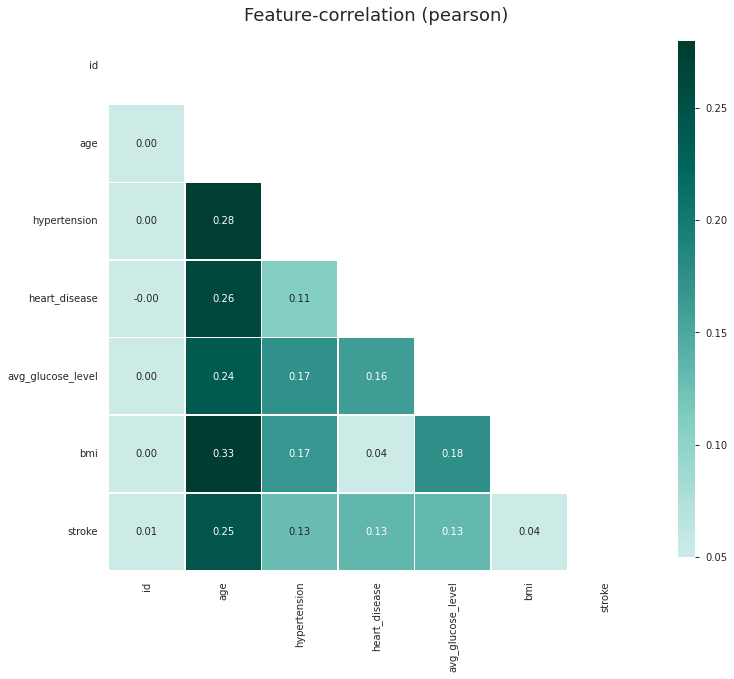

In [ ]:
klib.corr_plot(d_set)

In [ ]:
features = d_set[[ 'age', 'hypertension', 'heart_disease', 'ever_married',
       'avg_glucose_level', 'bmi',
       'smoking_status']]  
target = d_set[['stroke']]   

In [ ]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(missing_values=np.nan,strategy = "mean") 
imputer = imputer.fit(features[['age','bmi']]) 
features[['age','bmi']]= imputer.transform(features[['age','bmi']])

**Label Encoding:**

In [ ]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder

labelencoder_f = LabelEncoder()
features['n_smoking_status'] = labelencoder_f.fit_transform(features['smoking_status'])
features

age  hypertension  ...   smoking_status n_smoking_status
0     67.0             0  ...  formerly smoked                1
1     61.0             0  ...     never smoked                2
2     80.0             0  ...     never smoked                2
3     49.0             0  ...           smokes                3
4     79.0             1  ...     never smoked                2
...    ...           ...  ...              ...              ...
5105  80.0             1  ...     never smoked                2
5106  81.0             0  ...     never smoked                2
5107  35.0             0  ...     never smoked                2
5108  51.0             0  ...  formerly smoked                1
5109  44.0             0  ...          Unknown                0

[5110 rows x 8 columns]

**One Hot Encoding:**

In [ ]:
encoder=OneHotEncoder(sparse=False)
encoded_labels = pd.DataFrame(encoder.fit_transform(features[['smoking_status',]]))
encoded_labels.columns = encoder.get_feature_names(['smoking_status',])
d_set= pd.concat([features, encoded_labels], axis=1)
d_set

age  hypertension  ...  smoking_status_never smoked smoking_status_smokes
0     67.0             0  ...                          0.0                   0.0
1     61.0             0  ...                          1.0                   0.0
2     80.0             0  ...                          1.0                   0.0
3     49.0             0  ...                          0.0                   1.0
4     79.0             1  ...                          1.0                   0.0
...    ...           ...  ...                          ...                   ...
5105  80.0             1  ...                          1.0                   0.0
5106  81.0             0  ...                          1.0                   0.0
5107  35.0             0  ...                          1.0                   0.0
5108  51.0             0  ...                          0.0                   0.0
5109  44.0             0  ...                          0.0                   0.0

[5110 rows x 12 columns]

In [ ]:
d_set.columns

Index(['age', 'hypertension', 'heart_disease', 'ever_married',
       'avg_glucose_level', 'bmi', 'smoking_status', 'n_smoking_status',
       'smoking_status_Unknown', 'smoking_status_formerly smoked',
       'smoking_status_never smoked', 'smoking_status_smokes'],
      dtype='object')

In [ ]:
features = d_set[['age', 'hypertension', 'heart_disease','avg_glucose_level', 'bmi','smoking_status_Unknown', 'smoking_status_formerly smoked',
       'smoking_status_never smoked', 'smoking_status_smokes']]

**Splitting the Dataset into Train Set and Test Set:**

In [ ]:
"""Spliting the Dataset into Training Set and Test Set """

X_train,X_test,y_train,y_test=train_test_split(features,target,test_size = 0.2,random_state = 0)


In [ ]:
print(X_train.shape)
print(X_test.shape)

(4088, 9)
(1022, 9)


In [ ]:
X_test

age  hypertension  ...  smoking_status_never smoked  smoking_status_smokes
42    82.0             0  ...                          0.0                    1.0
380    4.0             0  ...                          0.0                    0.0
3524  58.0             0  ...                          1.0                    0.0
352   20.0             0  ...                          1.0                    0.0
4927  10.0             0  ...                          0.0                    0.0
...    ...           ...  ...                          ...                    ...
472   43.0             0  ...                          0.0                    1.0
4446  42.0             0  ...                          1.0                    0.0
660   52.0             0  ...                          0.0                    0.0
57    78.0             0  ...                          0.0                    0.0
2367  35.0             0  ...                          0.0                    0.0

[1022 rows x 9 columns]

**Logistic Regression:**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,f1_score,precision_score,recall_score

# Fitting Logistic Regression to the training dataset
lr = LogisticRegression()

lr.fit(X_train,y_train)

LogisticRegression()

In [ ]:
# prediction
y_pred = lr.predict(X_test)

In [ ]:
# Making confusing matrix (actual,prediction)
confusion_matrix(y_test,y_pred)

array([[968,   0],
       [ 54,   0]])

In [ ]:
# Making confusing matrix
print(classification_report(y_test,y_pred,target_names = ['No','Yes']))

              precision    recall  f1-score   support

          No       0.95      1.00      0.97       968
         Yes       0.00      0.00      0.00        54

    accuracy                           0.95      1022
   macro avg       0.47      0.50      0.49      1022
weighted avg       0.90      0.95      0.92      1022



**K Nearest Neighbor:**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Classifier Model
classifier = KNeighborsClassifier(n_neighbors=5, metric = 'minkowski', p=2)
classifier.fit(X_train,y_train)
# Prediction
y_pred = classifier.predict(X_test)

In [ ]:
# Making confusing matrix
print(confusion_matrix(y_test,y_pred))

# Making confusing matrix
print(classification_report(y_test,y_pred,target_names = ['No','Yes']))

[[960   8]
 [ 53   1]]
              precision    recall  f1-score   support

          No       0.95      0.99      0.97       968
         Yes       0.11      0.02      0.03        54

    accuracy                           0.94      1022
   macro avg       0.53      0.51      0.50      1022
weighted avg       0.90      0.94      0.92      1022



**Support Vector Machine:**

In [ ]:
from sklearn.svm import SVC

# Classifier Model
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train,y_train)
# Prediction
y_pred = classifier.predict(X_test)

In [ ]:
# Making confusing matrix
print(confusion_matrix(y_test,y_pred))

# Making confusing matrix
print(classification_report(y_test,y_pred,target_names = ['No','Yes']))

[[968   0]
 [ 54   0]]
              precision    recall  f1-score   support

          No       0.95      1.00      0.97       968
         Yes       0.00      0.00      0.00        54

    accuracy                           0.95      1022
   macro avg       0.47      0.50      0.49      1022
weighted avg       0.90      0.95      0.92      1022



**Decision Tree Classifier:**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
# Classifier Model
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train,y_train)
# Prediction
y_pred = classifier.predict(X_test)

In [ ]:
# Making confusing matrix
print(confusion_matrix(y_test,y_pred))

# Making confusing matrix
print(classification_report(y_test,y_pred,target_names = ['No','Yes']))

[[931  37]
 [ 48   6]]
              precision    recall  f1-score   support

          No       0.95      0.96      0.96       968
         Yes       0.14      0.11      0.12        54

    accuracy                           0.92      1022
   macro avg       0.55      0.54      0.54      1022
weighted avg       0.91      0.92      0.91      1022



**Random Forest Classifier:**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
# Classifier Model
classifier = RandomForestClassifier(n_estimators=10, criterion ='entropy', random_state = 0)
classifier.fit(X_train,y_train)
# Prediction
y_pred = classifier.predict(X_test)


In [ ]:
# Making confusing matrix
print(confusion_matrix(y_test,y_pred))

# Making confusing matrix
print(classification_report(y_test,y_pred,target_names = ['No','Yes']))

[[964   4]
 [ 54   0]]
              precision    recall  f1-score   support

          No       0.95      1.00      0.97       968
         Yes       0.00      0.00      0.00        54

    accuracy                           0.94      1022
   macro avg       0.47      0.50      0.49      1022
weighted avg       0.90      0.94      0.92      1022



**Naive Bayes:**

In [ ]:
from sklearn.naive_bayes import GaussianNB

# Classifier Model
classifier = GaussianNB()
classifier.fit(X_train,y_train)
# Prediction
y_pred = classifier.predict(X_test)

In [ ]:
# Making confusing matrix
print(confusion_matrix(y_test,y_pred))

# Making confusing matrix
print(classification_report(y_test,y_pred,target_names = ['No','Yes']))

[[884  84]
 [ 33  21]]
              precision    recall  f1-score   support

          No       0.96      0.91      0.94       968
         Yes       0.20      0.39      0.26        54

    accuracy                           0.89      1022
   macro avg       0.58      0.65      0.60      1022
weighted avg       0.92      0.89      0.90      1022



**Conclusion:**

*   Logistic Regression: Here overall model accuracy is 95% but F1 score for classwise accuracy is 97% for No class and 0% accuracy for Yes class.
*   K Nearest Neighbor: Here overall model accuracy is 94% but F1 score for classwise accuracy is 97% for No class and 3% accuracy for Yes class.
*   Support Vector Machine: Overall model accuracy is 94% but F1 score for classwise accuracy is 97% for No class and 3% accuracy for Yes class.
*   Decision Tree Classifier: Overall model accuracy is 96% but F1 score for classwise accuracy is 96% for No class and 12% accuracy for Yes class.
*   Random Forset Classifier: Overall model accuracy is 94% but F1 score for classwise accuracy is 97% for No class and 0% accuracy for Yes class.
*   Naive Bayes: Overall model accuracy is 89% but F1 score for classwise accuracy is 94% for No class and 26% accuracy for Yes class.

So, in summary it can  be said that, Naive bayes algorithm is best fitted for the given dataset according to F1 score analysis.







